# Mercedes instagram profile topic analysis

In [1]:
import pandas as pd
import hdbscan
from bertopic import BERTopic
from bertopic.representation import KeyBERTInspired
import plotly.express as px

/Users/kaushikdayalan/projects/storymachine_projects/porsche_topic_analysis/.env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-10-25 16:28:32.617938: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Reading the dataframe

In [2]:
df = pd.read_csv("./data/mercedes_instagram.csv")

In [3]:
df.head()

,postUrl,postContent,commentCount,likeCount,postTimestamp,type,viewCount,profileUrl,username,playCount
0,https://www.instagram.com/p/Cm7Se3INa39/,Vehicle of the Week: Mercedes-AMG GT R Coupe,6,201,2023-01-02 20:35:08+00:00,Video,NaN,https://www.instagram.com/usamgacademy,usamgacademy,NaN
1,https://www.instagram.com/p/Cm9YSviIkto/,What’s your favorite driving season? 🌸☀️🍂❄️,15,166,2023-01-03 16:04:24+00:00,Photo,NaN,https://www.instagram.com/usamgacademy,usamgacademy,NaN
2,https://www.instagram.com/p/Cm_4bRSh_ZM/,Flames in the comments if you’d like to take t...,25,321,2023-01-04 15:24:25+00:00,Video,NaN,https://www.instagram.com/usamgacademy,usamgacademy,3401.0
3,https://www.instagram.com/p/CnE_Z21uov1/,AI activated ✅ Can you guess which track we’re...,11,166,2023-01-06 15:01:12+00:00,Video,NaN,https://www.instagram.com/usamgacademy,usamgacademy,3171.0
4,https://www.instagram.com/p/CnM3x64t3aO/,Vehicle of the Week: The Mercedes-AMG GT Coupe,11,148,2023-01-09 16:28:08+00:00,Video,NaN,https://www.instagram.com/usamgacademy,usamgacademy,NaN


## BerTopic Model and topic modelling

In [17]:
representation_model = KeyBERTInspired()
model = BERTopic(representation_model=representation_model, language="multilingual", n_gram_range=(1, 3))
topics, probs = model.fit_transform(df.postContent.values)

In [18]:
print("Model Topics \n")

model.get_topic_info().Name.values

Model Topics 



array(['-1_the month winner_month winner_month winner comment_winner comment below',
       '0_amg driving academy_2023 amg driving_amg driving_the amg driving',
       '1_winning our photo_month congratulations_next month congratulations_month congratulations to',
       '2_amg gt coupe_gt coupe_coupe_mercedes amg vehicles',
       '3_seats are you_below do you_you sitting_sitting in or',
       '4_track at_the track at_racesonoma track at_the racesonoma track',
       '5_our bio ready_link in bio_our bio tag_in bio'], dtype=object)

In [19]:
print("Topic Representations: \n")

for representation in model.get_topic_info().Representation:
    print(representation)
    print()

Topic Representations: 

['the month winner', 'month winner', 'month winner comment', 'winner comment below', 'your favorite photo', 'emoji of your', 'winner', 'winner comment', 'your photo of', 'favorite photo']

['amg driving academy', '2023 amg driving', 'amg driving', 'the amg driving', 'driving academy', 'driving academy is', 'driving academy via', 'driving academy sign', 'at the amg', 'for the amg']

['winning our photo', 'month congratulations', 'next month congratulations', 'month congratulations to', 'our awesome photos', 'next month happy', 'our photo of', 'our photo', 'congratulations to', 'congratulations']

['amg gt coupe', 'gt coupe', 'coupe', 'mercedes amg vehicles', 'amg vehicles', 'amg vehicles can', 'vehicles', 'vehicle', 'vehicle of the', 'vehicle of']

['seats are you', 'below do you', 'you sitting', 'sitting in or', 'puzzling which seats', 'us know below', 'you', 'do you prefer', 'see real or', 'know below']

['track at', 'the track at', 'racesonoma track at', 'the

In [20]:
model.get_topic_freq()

,Topic,Count
5,-1,57
4,0,38
3,1,32
0,2,30
1,3,23
6,4,13
2,5,12


Plotting Topic cluster 



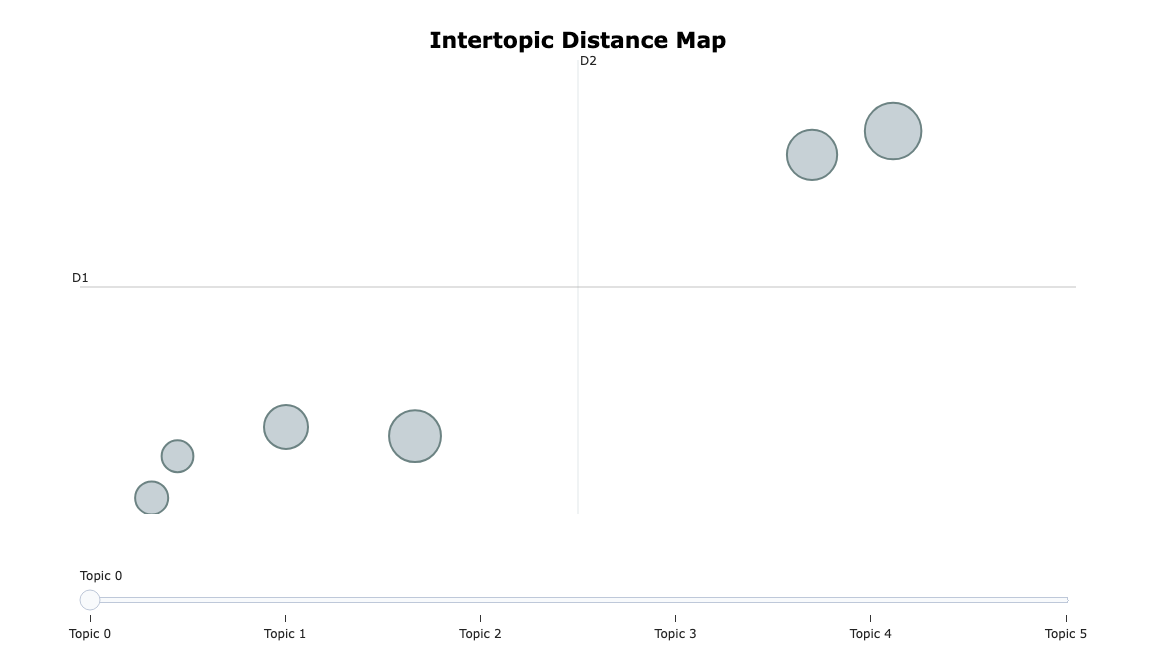

In [22]:
print("Plotting Topic cluster \n")
try:
    fig = model.visualize_topics()
    fig.show()
except:
    print("Topic count too short. Cannot get visualisation")

Plotting Similarity Heatmap 



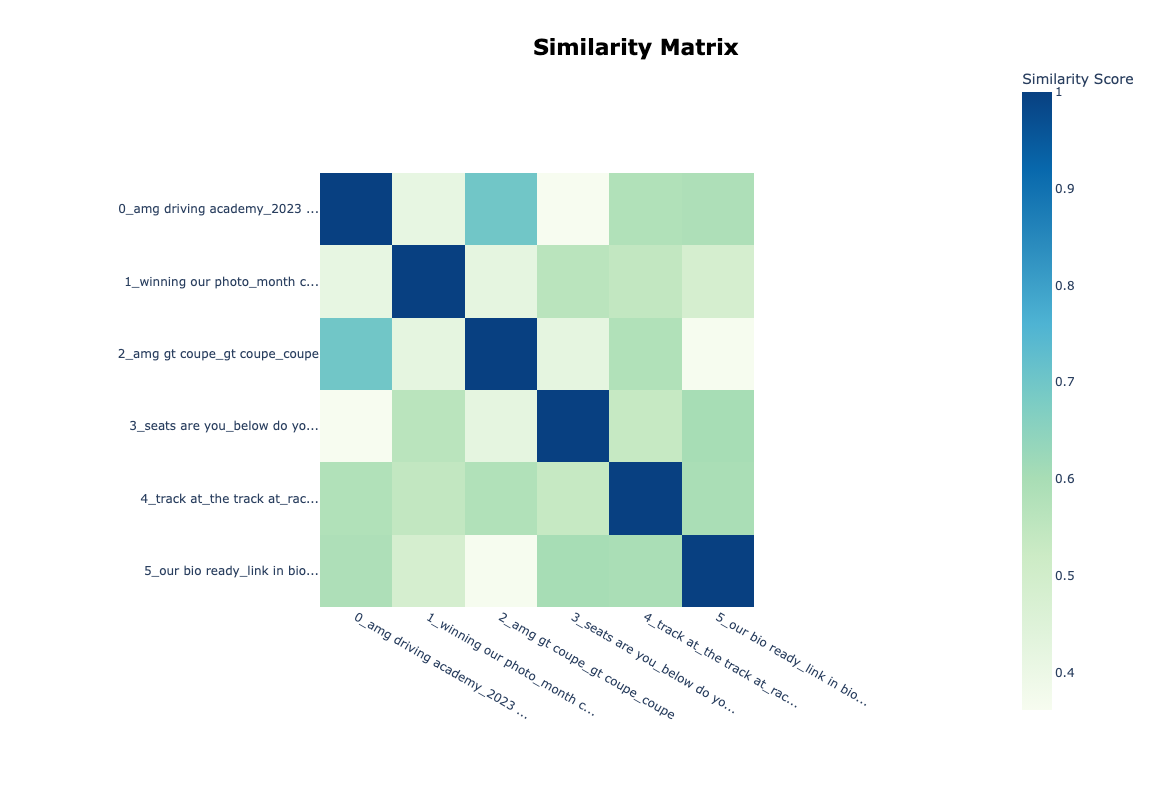

In [23]:
print("Plotting Similarity Heatmap \n")

model.visualize_heatmap()

In [24]:
topic_dataframe = model.get_document_info(df.postContent.values)

In [25]:
df["Topic"] = topic_dataframe["Topic"]

## keyword/topic_representation to Topic generation (chatGPT)

In [26]:
topics = {
    -1: "others",
    0: "AMG Driving Academy and Track Events",
    1: "Photo Contests and Acknowledgments",
    2: "Automotive Design and Icons",
    3: "AMG Driving Academy and Track Events",
    4: "Race Events and Pit Stops",
    5: "Photography and Memory Captures"
}

In [27]:
df["Topic"] = df["Topic"].map(topics)

## Plotting Topic Distribution

In [28]:
def get_topic_pie_chart(df: pd.DataFrame):
    value_count = pd.DataFrame(df.groupby(["Topic"]).size()).reset_index()
    fig = px.pie(data_frame=value_count, values=0, names="Topic", height=800, width=800)
    return fig

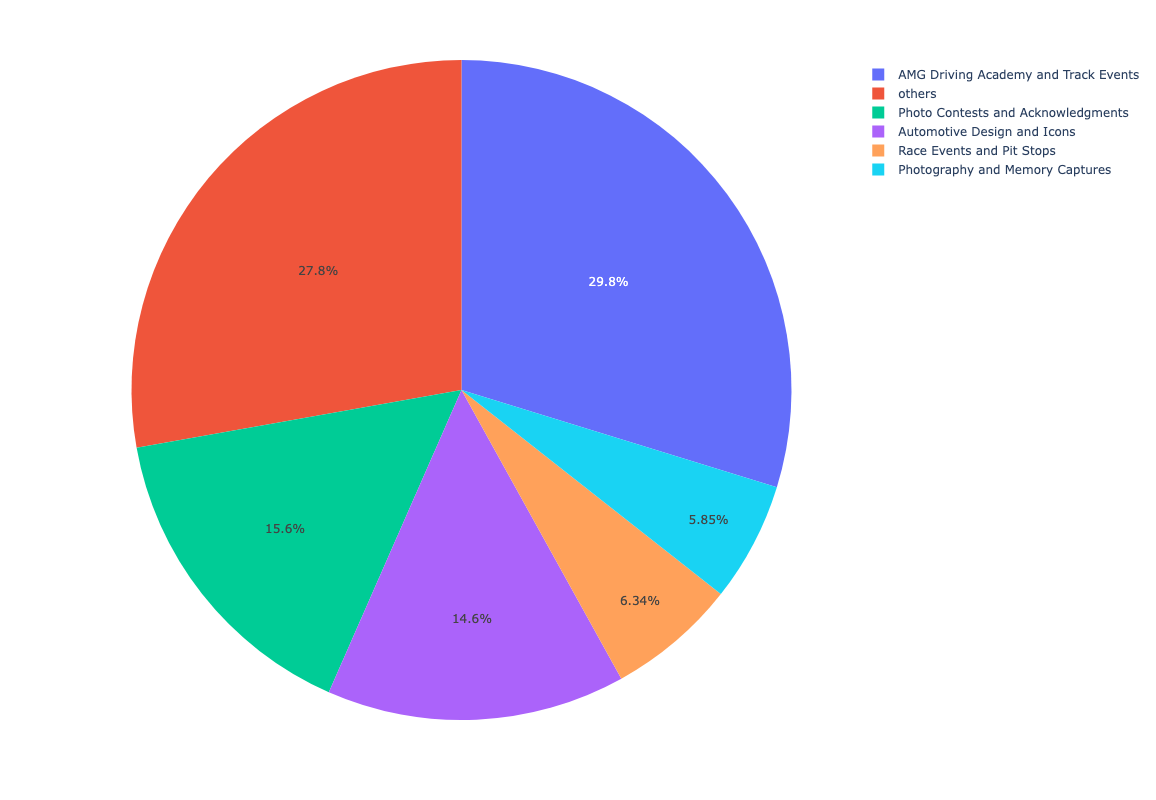

In [29]:
get_topic_pie_chart(df=df).show()

## Writing output file

In [ ]:
# df.to_excel("./data/mercedes_instagram_topics.xlsx", index=False)